In [1]:
import pandas as pd
import FreeBack as FB

data = pd.read_csv('data.csv.xz', parse_dates=['date']).\
    set_index(['date', 'code'])

# Porfortlio

<Figure size 640x480 with 0 Axes>

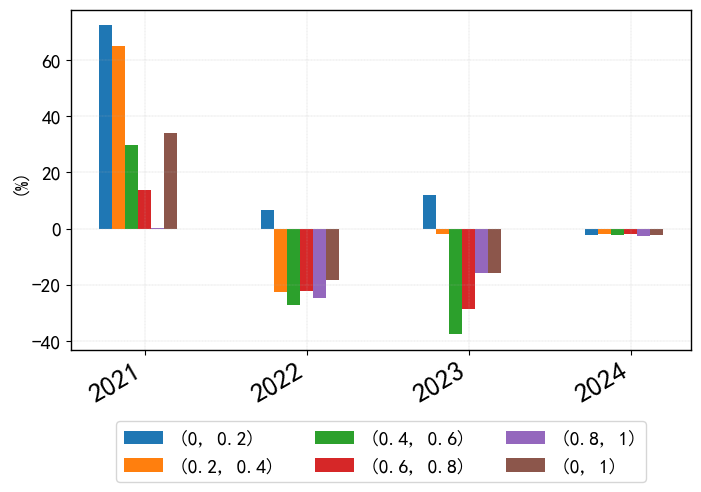

In [2]:
# 市值从小到大分为5组收益
pfl0 = FB.alpha.Portfolio((data['total_shares']*data['close']),\
                           data['close'], divide=(0, 0.2, 0.4, 0.6, 0.8, 1), periods=(1,))
pfl0.Bar()

<Figure size 640x480 with 0 Axes>

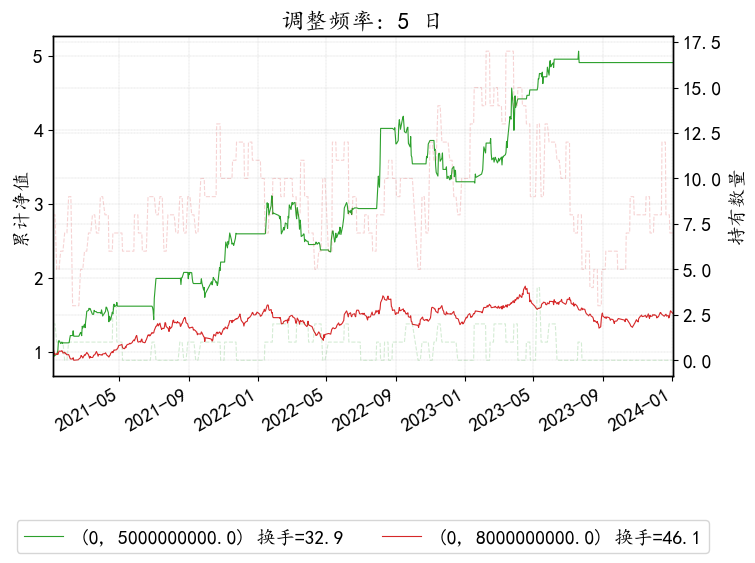

In [13]:
# 市值小于50亿，小于80亿大于50亿
pfl0 = FB.alpha.Portfolio((data['total_shares']*data['close']),\
                           data['close'], norm=False, \
                           divide=[(0,5e9), (0, 8e9)],\
                              justdivide=True, periods=(5,))
pfl0.HoldReturn(0)

整数排序


<Figure size 640x480 with 0 Axes>

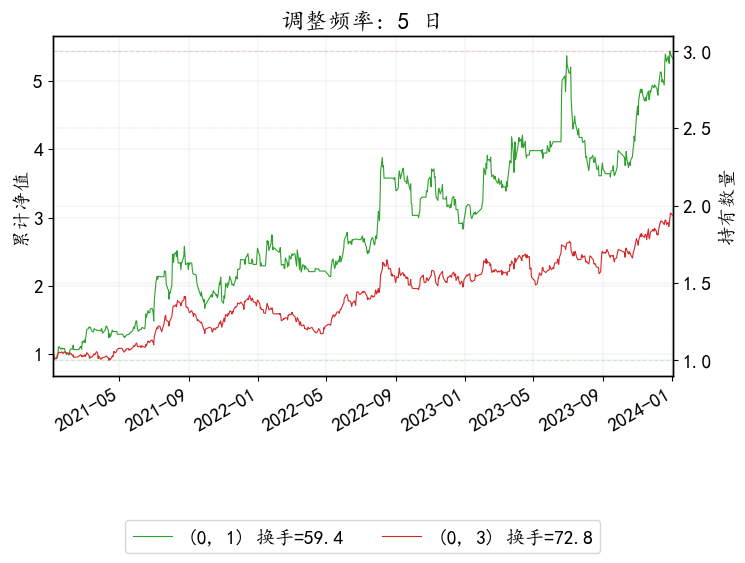

In [14]:
# 市值最小的5只、10只
pfl0 = FB.alpha.Portfolio((data['total_shares']*data['close']),\
                           data['close'], norm=True, \
                           divide=[(0,1), (0,3)],\
                              justdivide=True, periods=(5,))
pfl0.HoldReturn(0)